## 第二次实验

In [25]:
import matplotlib.font_manager
from gensim.models import Word2Vec
import re
import jieba
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
f = open("sanguo.txt","r",encoding='utf-8')
    #jieba分词处理
lines = []
for line in f:
    temp = jieba.lcut(line)
    word = []
    for i in temp:
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+","",i)
        if len(i)>0:
            word.append(i)
    if(len(word)>0):
        lines.append(word)
print(lines[0:5])

[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['--', '调寄', '临江仙']]


## 模型训练

In [19]:
model = Word2Vec(lines,min_count=3,vector_size=20,window=2,sg=1,negative=10,epochs=7)
print("诸葛亮的词向量\n",model.wv.get_vector("诸葛亮"))
print("与诸葛亮最相关的25个词\n",)
model.wv.most_similar("诸葛亮",topn=20)

诸葛亮的词向量
 [ 0.12822282  0.22007667  0.6101871   0.54150295  0.3047296   0.17492053
 -0.45585582  1.0524539  -0.5915823   0.59974116  0.34154323  0.57435745
  0.00833159 -0.35171196  0.2884208   0.37655792  0.6725207  -0.5534012
 -0.9785747  -0.54606503]
与诸葛亮最相关的25个词



[('妾', 0.9090977907180786),
 ('曾', 0.9057681560516357),
 ('方', 0.9051426649093628),
 ('吾', 0.9040657877922058),
 ('刘备', 0.9010693430900574),
 ('吾料', 0.8989660739898682),
 ('一旦', 0.8934509754180908),
 ('身', 0.8933186531066895),
 ('魏', 0.8932047486305237),
 ('未必', 0.8930884003639221),
 ('蜀中', 0.8928126692771912),
 ('程昱', 0.8915925621986389),
 ('他人', 0.8911513686180115),
 ('早晚', 0.8909286856651306),
 ('关某', 0.890371561050415),
 ('归降', 0.8903021216392517),
 ('不得不', 0.8892630934715271),
 ('匹夫', 0.889229953289032),
 ('老', 0.8889913558959961),
 ('亮', 0.8871552348136902)]

## 降维

In [21]:

rawWord2Vec = []
index2ind = {}
for i,w in enumerate(model.wv.index_to_key):
    rawWord2Vec.append(model.wv[w])
    index2ind[w] = i
rawWord2Vec = np.array(rawWord2Vec)
X_reduced = PCA(n_components=2).fit_transform(rawWord2Vec)

In [22]:
print(X_reduced)

[[-1.4439051   0.10859068]
 [-0.94818443  0.10803492]
 [-1.1515951  -0.00383794]
 ...
 [ 0.01524145 -0.17719483]
 [ 0.11118923 -0.2120207 ]
 [ 0.24310689 -0.22049887]]


In [23]:
print(rawWord2Vec)

[[ 0.10545319  0.5664984  -0.41432717 ... -0.40330634 -1.7635051
  -1.329519  ]
 [-0.38522768  1.0856296   0.13202213 ... -0.55647737 -0.91880465
  -1.1143912 ]
 [ 0.21807048  0.9890282  -0.12442413 ... -0.47130093 -1.1487721
  -0.6601139 ]
 ...
 [-0.06656736  0.22170755 -0.25075817 ... -0.4529942  -0.48200455
  -0.22657396]
 [-0.18619196  0.19927068 -0.22987863 ... -0.4880984  -0.46695393
  -0.20227721]
 [-0.23819822  0.24517079 -0.29657283 ... -0.3481459  -0.51155996
  -0.07919248]]


## 可视化

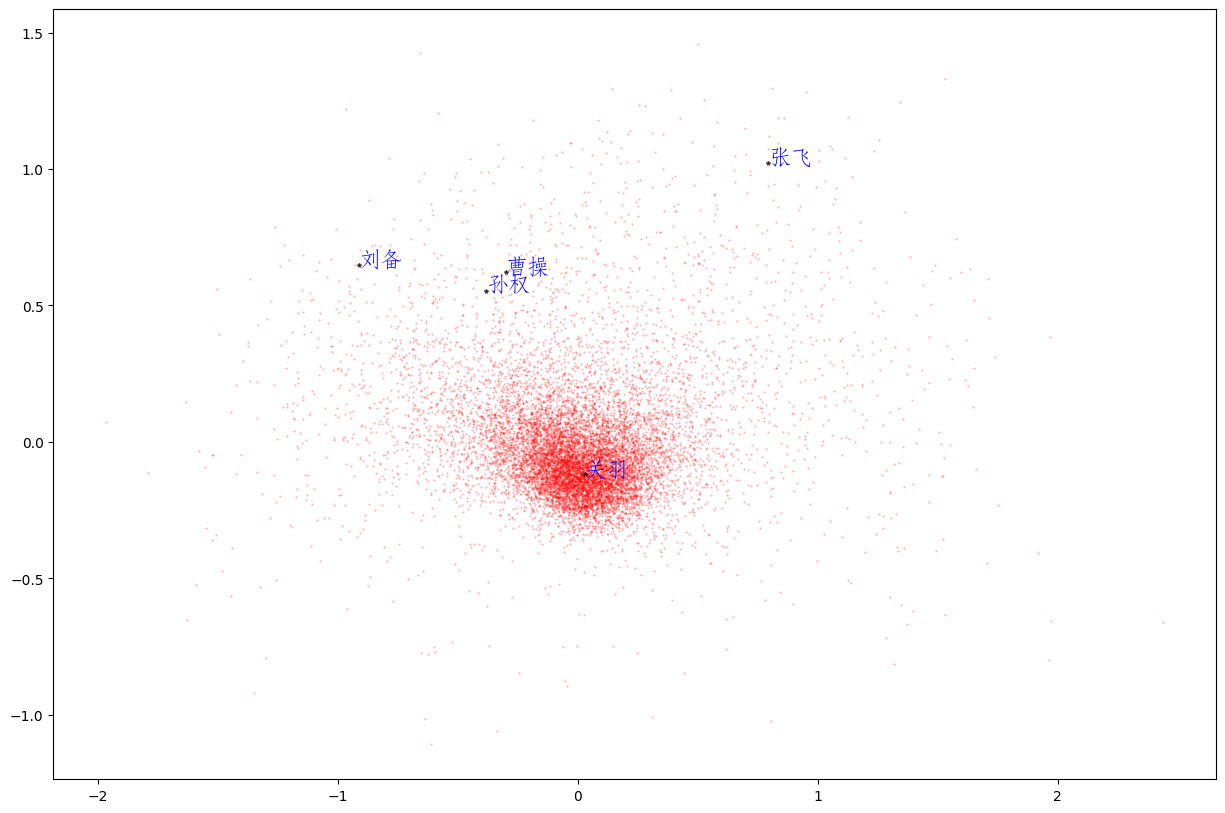

In [40]:
figure = plt.figure(figsize=(15,10))
ac = figure.gca()

ac.plot(X_reduced[:,0],X_reduced[:,1],'.',alpha=0.3,markersize=1,color='red')

import matplotlib
words = ['孙权','刘备','关羽','张飞','曹操']
fontproperties = matplotlib.font_manager.FontProperties(fname='华文仿宋.ttf',size=16)
for w in words:
    if w in index2ind:
        x = index2ind[w]
        xx = X_reduced[x]
        plt.plot(xx[0],xx[1],'*',markersize=3,alpha=0.6,color='black')
        plt.text(xx[0],xx[1],w,fontproperties=fontproperties,alpha=1,color='blue')